In [ ]:
# 혼공머신

In [ ]:
# Chapter 06 비지도 학습

In [ ]:
# 06-3 주성분 분석

In [1]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

--2022-07-18 02:04:35--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2022-07-18 02:04:35--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2022-07-18 02:04:35--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... c

In [2]:
# n_components : 주성분의 개수 지정
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [4]:
print(pca.components_.shape)

(50, 10000)


In [6]:
import matplotlib.pyplot as plt
def draw_fruits(arr, ratio=1):
  n=len(arr) 
  rows = int(np.ceil(n/10))
  cols = n if rows < 2  else 10
  fig, axs = plt.subplots(rows, cols,
                          figsize = (cols*ratio, rows*ratio), squeeze=False)
  for i in range(rows):
    for j in range(cols):
      if i*10 + j<n: 
        axs[i,j].imshow(arr[i*10 + j], cmap='gray_r')
      axs[i,j].axis('off')
  plt.show()

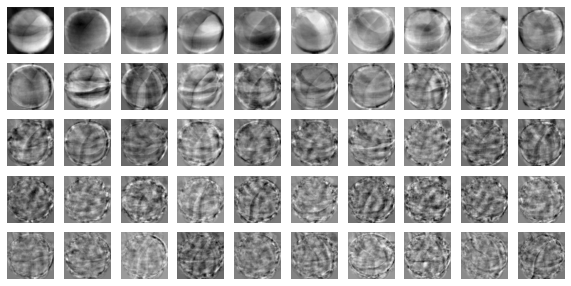

In [8]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [9]:
print(fruits_2d.shape)

(300, 10000)


In [10]:
#차원축소
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


In [11]:
# 원본 데이터 재구성
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


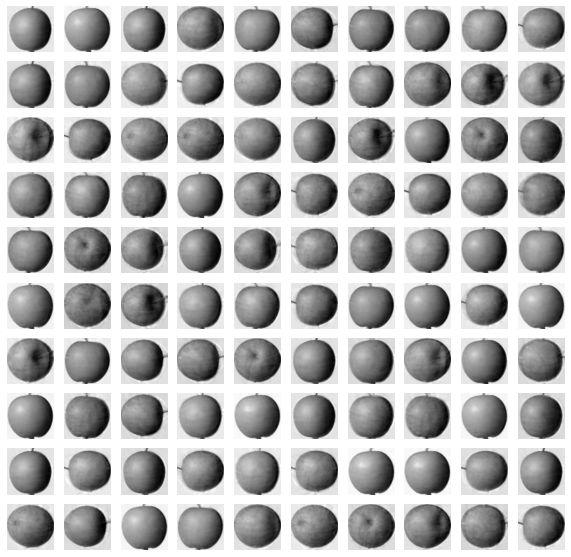

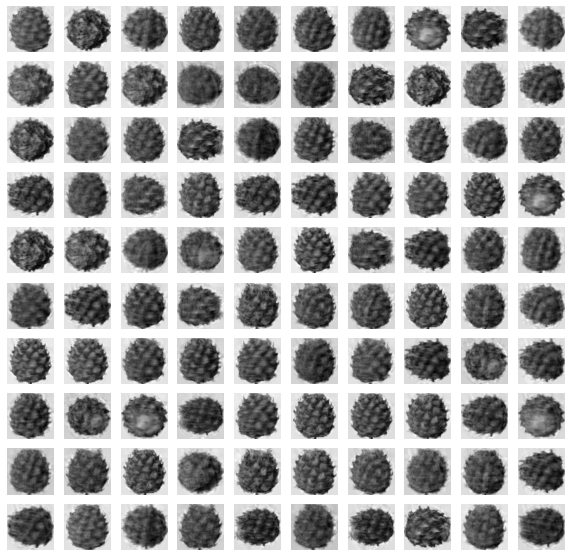

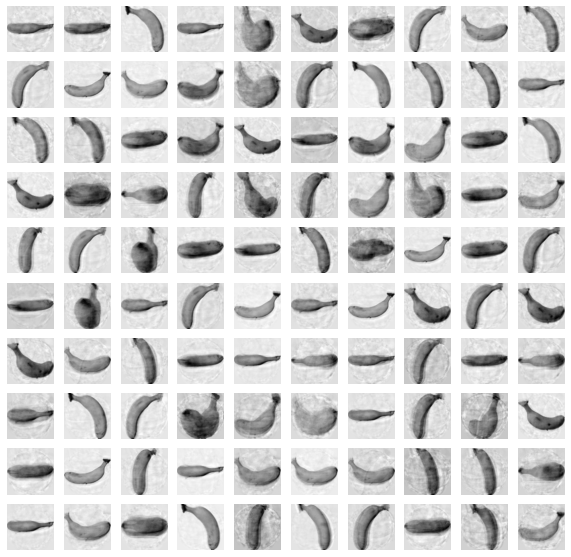

In [13]:
# 100X100 크기로 바꾸어 100개씩 나누어 출력
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0,100, 200]:
  draw_fruits(fruits_reconstruct[start:start+100])
  print("\n")

In [14]:
# 설명된 분산 : 주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값
# explained_variance_ratio : 각 주성분의 설면된 분산 비율이 기록되어 있음
print(np.sum(pca.explained_variance_ratio_))

0.9214732432438338


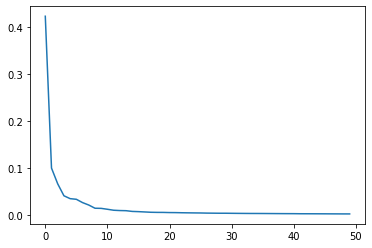

In [15]:
# 설명된 분산의 비율을 그래프로 그림
plt.plot(pca.explained_variance_ratio_)
plt.show()
# 처음 10개의 주성분이 대부분의 분산을 표현하고 있음

In [16]:
# 과일 사진 원본 데이터와 PCA로 축소한 데이터를 지도 학습에 적용해보고 차이점 알아봄
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [17]:
target = np.array([0]*100 + [1]*100+[2]*100)

In [18]:
# fit_time : 각 교차 검증 폴드의 훈련 시간이 기록되어 있음
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
1.355003786087036


In [19]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.04594578742980957


In [20]:
# n_components에 주성분의 개수 대신 원하는 설명된 분산의 비율 입력 가능
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [22]:
print(pca.n_components_)

2


In [24]:
# 데이터 변환
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [26]:
# 교차검증
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.99
0.038561010360717775


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [28]:
# k-평균 알고리즘으로 클러스터 찾기
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


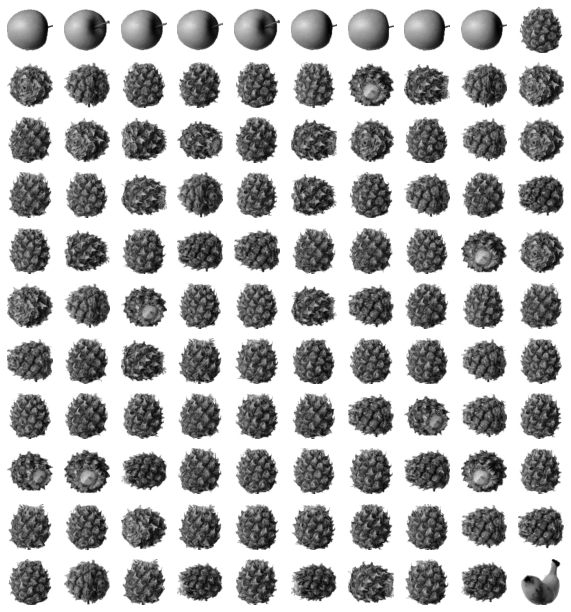

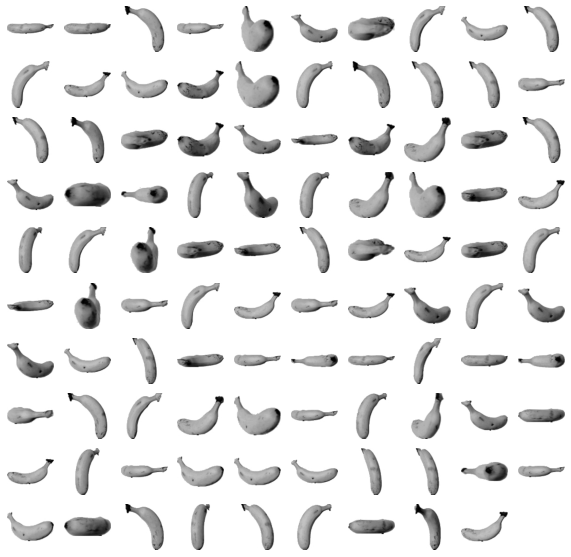

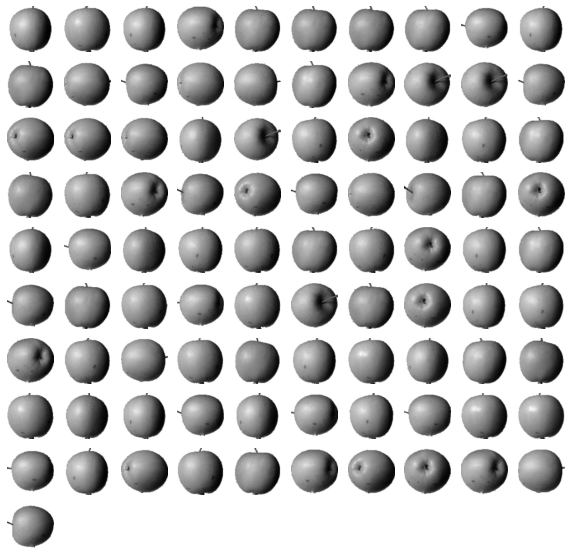

In [29]:
# 과일 이미지 출력
for label in range(0,3):
  draw_fruits(fruits[km.labels_ == label])
  print("\n")

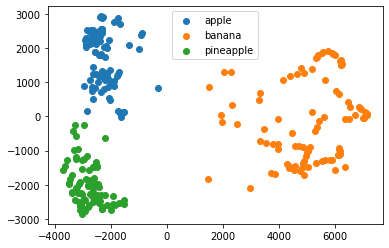

In [31]:
# 클러스터별로 나누어 산점도 그리기
for label in range(0,3):
  data = fruits_pca[km.labels_ == label]
  plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show() 